In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import itertools
import collections
import random
import functools
import statistics
import math
import re
import pprint as pp
import networkx as nx


plt.rc('image', cmap='viridis')
plt.style.use('dark_background')


def Input(day):
    "Open input file for the day"
    file = '2022/input{0}.txt'.format(day)
    return open(file)


## Day 1: Calorie Counting

249
Part One:  69310
Part Two:  206104


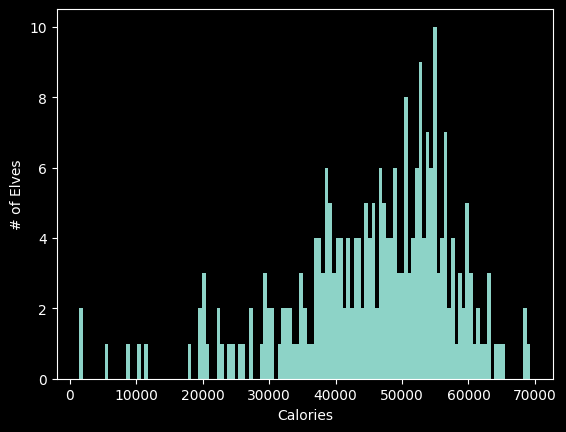

In [2]:
with Input(1) as f:
    elves =  [[]]

    line = f.readline()
    while line:
        if line == '\n':
            elves.append([])
        else:
            elves[-1].append(int(line))
        line = f.readline()

counts = [sum(elf) for elf in elves]

# Find answers
counts.sort(reverse=True)

print(len(counts))
print('Part One: ', counts[0])

print('Part Two: ', sum(counts[0:3]))

# Plot
fig, ax = plt.subplots()
plt.xlabel('Calories')
plt.ylabel('# of Elves')
ax.hist(counts, bins=125, linewidth=0.01)
plt.show()



## Day 2: Rock Paper Scissors

15523
15702


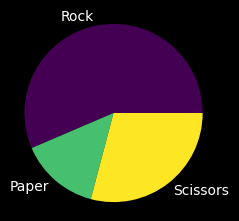

In [3]:
SCORES = {'X':1, 'Y':2, 'Z':3}
OUTCOMES = {
    "AX": 3, # ROCK ROCK
    "AY": 6, # ROCK PAPER
    "AZ": 0, # ROCK SCISSORS
    "BX": 0, # PAPER ROCK
    "BY": 3, # PAPER PAPER
    "BZ": 6, # PAPER SCISSORS
    "CX": 6, # SCISSORS ROCK
    "CY": 0, # SCISSORS PAPER
    "CZ": 3  # SCISSORS SCISSORS
}

# X LOSE : X ROCK
# Y DRAW : Y PAPER
# Z WIN  : Z SCISSORS
PLAY = {
    'A': {'X': 'Z', 'Y': 'X', 'Z': 'Y'},
    'B': {'X': 'X', 'Y': 'Y', 'Z': 'Z'},
    'C': {'X': 'Y', 'Y': 'Z', 'Z': 'X'}
}

def score_round(opp, me):
    return SCORES[me] + OUTCOMES[opp + me]

def score_round_2(opp, goal):
    return SCORES[PLAY[opp][goal]] + OUTCOMES[opp+PLAY[opp][goal]]

with Input(2) as f:
    lines = [l.strip().split(' ') for l in f.readlines()] 

    # Part 1
    score = 0
    for line in lines:
        score += score_round(line[0], line[1])
    print(score)

    # Part 2
    score = 0
    for line in lines:
        score += score_round_2(line[0], line[1])
    print(score)

    # Plot
    plt.style.use('_mpl-gallery-nogrid')
    cmap = plt.get_cmap("viridis")
    colors = cmap([0, 180, 360])

    throws = []
    for line in lines:
        throws.append(PLAY[line[0]][line[1]])
    
    throws = [len(list(g)) for k, g in itertools.groupby(sorted(throws))]
    
    labels = 'Rock', 'Paper', 'Scissors'

    fig1, ax1 = plt.subplots()
    ax1.pie(throws, labels=labels, colors=colors, startangle=0)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



## Day 3: Rucksack Reorganization

In [4]:
alpha = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
priorities  = {v: k+1 for k,v in enumerate(alpha)}

def priority(c):
    return priorities[c]

def find_match(s):
    first = set(s[0:len(s) // 2])
    second = set(s[len(s) // 2:])
    return first.intersection(second).pop()

def threewise(iterable):
    a, b, c = itertools.tee(iterable, 3)
    a = list(a)[::3]
    b = list(b)[1::3]
    c = list(c)[2::3]
    return list(zip(a, b, c))

def find_badges(rucksacks):
    return set(rucksacks[0]).intersection(set(rucksacks[1])).intersection(set(rucksacks[2])).pop()

with Input(3) as f:
    lines = [l.strip() for l in f.readlines()]

    # Part 1
    print(sum([priority(find_match(line)) for line in lines]))

    # Part 2
    groups = threewise(lines)
    print(sum([priority(find_badges(group)) for group in groups]))


8109
2738


## Day 4: Camp Cleanup

In [5]:

def contains(pair):
    first_in_second = pair[0][0] >= pair[1][0] and pair[0][1] <= pair[1][1]
    second_in_first = pair[0][0] <= pair[1][0] and pair[0][1] >= pair[1][1]
    return first_in_second or second_in_first

def overlaps(pair):
    first = pair[1][0] <= pair[0][0] <= pair[1][1]
    second = pair[1][0] <= pair[0][1] <= pair[1][1]
    third = pair[0][0] <= pair[1][0] <= pair[0][1]
    fourth = pair[0][0] <= pair[1][0] <= pair[0][1]
    return first or second or third or fourth

with Input(4) as f:
    lines = [(tuple(map(int,i[0].split('-'))), tuple(map(int,i[1].split('-')))) for l in f.readlines() for i in itertools.pairwise(l.strip().split(','))]

    # Part One
    contained = filter(contains, lines)
    print(len(list(contained)))

    # Part Two
    overlapped = filter(overlaps, lines)
    print(len(list(overlapped)))


534
841


## Day 5: Supply Stacks

In [6]:
def process(stacks, command):
    for _ in range(command[0]):
        stacks[command[2]].appendleft(stacks[command[1]].popleft())

def process_two(stacks, command):
    popped = collections.deque()
    for _ in range(command[0]):
        popped.appendleft(stacks[command[1]].popleft())
    stacks[command[2]].extendleft(popped)

with Input(5) as f:
    lines = [l for l in f.readlines()]

# Build Stacks
stack_strings = [l.replace('    ', '_').replace('[','').replace(']','').replace(' ','').strip() for l in lines[:8]]
stacks = {}
stacks_two = {}
for i in range(1,10):
    stacks[i] = collections.deque()
    stacks_two[i] = collections.deque()
    for s in stack_strings:
        if s[i-1] != '_':
            stacks[i].append(s[i-1])
            stacks_two[i].append(s[i-1])

#Parse Input
pattern = re.compile('move (\d+) from (\d+) to (\d+)')
commands = [l.strip() for l in lines[10:]]
commands = [(int(c[1]),int(c[2]), int(c[3])) for c in map(pattern.search, commands)]

# Part 1
for command in commands:
    process(stacks,command)

for num, stack in stacks.items():
    print(stack[0], end='')
print()

##
# fig, ax = plt.subplots(figsize=(4,4))
# bar_container = ax.bar(range(1,10), counts, color=colors)
# counts = [len(s) for s in stacks_two.items()]
# cmap = plt.get_cmap("viridis")
# colors = cmap([0, 30, 60, 90, 120, 180, 240, 300, 360])
# time_text = ax.text(0.05, 0.9, '0', transform=ax.transAxes)
# ax.set_xticks(range(1,10))
# ax.set_yticks(range(0,60,5))
# ax.set_ylabel('Size')
# ax.set_title('Stacks')
##

# Part 2
for command in commands:
    process_two(stacks_two,command)

for num, stack in stacks_two.items():
    print(stack[0], end='')
print()

# last_processed = -1
# def animate(i):
#     global last_processed
#     if i > last_processed:
#         last_processed = i
#         process_two(stacks_two, commands[i])
#         heights = [len(s) for _, s in stacks_two.items()]
#         for count, rect in zip(range(0,9), bar_container.patches):
#             rect.set_height(heights[count])
#         time_text.set_text(i)
#     return bar_container


# ani = animation.FuncAnimation(fig, animate, len(commands) - 1,
#                               repeat=False, blit=True)
# writer = animation.PillowWriter(fps=10)
# ani.save("sine_example.gif", writer=writer)


FZCMJCRHZ
JSDHQMZGF


## Day 6: Tuning Trouble

In [7]:
with Input(6) as f:
    buffer = f.readline()

    # Part 1
    i = 4
    while len(set(buffer[i-1:i-1-4:-1])) != 4:
        i += 1
    print(i)

    # Part 2
    i = 14
    while len(set(buffer[i-1:i-1-14:-1])) != 14:
        i += 1
    print(i)


1929
3298


## Day 7: No Space Left On Device

In [8]:
def parse_command_output(current, history, dir, command_output):
    command = command_output[0].split()
    output = list(map(str.split, command_output[1:]))
    if command[0] == 'cd':
        if command[1] == '/':
            current = '/'
            history = ['/']
        elif command[1] == '..':
            current = history.pop()
        else:
            curr_dir = dir
            for h in history:
                curr_dir = curr_dir[h]
            current = command[1]
            if current not in curr_dir:
                curr_dir[current] = dict()
            history.append(command[1])
    elif command[0] == 'ls':
        for line in output:
            if line[0] == 'dir':
                pass
            else: 
                curr_dir = dir
                for h in history:
                    curr_dir = curr_dir[h]
                curr_dir[line[1]] = int(line[0])
    return current, history

total = 0
candidate = 9999999999999
def sum_dir(dir):
    global total, candidate
    sum = 0
    for k, v in dir.items():
        if type(v) == dict:
            sum += sum_dir(v)
        elif type(v) == int:
            sum += v
    if sum <= 100000:
        total += sum
    if sum >= 4804833 and sum < candidate:
        candidate = sum
    return sum



with Input(7) as f:
    commands = [l.strip().splitlines() for l in f.read().split("$") if l != '']

    dir = dict()
    current = '/'
    history = ['/']
    dir['/'] = dict()

    for command in commands:
        current, history = parse_command_output(current, history, dir, command)

def print_dir(dir, prefix='-'):
    for k,v in dir.items():
        if type(v) == dict:
            print(prefix, k, '(dir)')
            print_dir(v, '    ' + prefix)
        elif type(v) == int:
            print(prefix, k, '(', v, ')')

disk = 70000000
used = sum_dir(dir)
# Part 1
print(total)

# Part 2
available = disk - used
needed = 30000000 - available
print('Candidate: ', candidate)


1297683
Candidate:  5756764


## Day 8: Treetop Tree House

In [9]:
with Input(8) as f:
    forest = [list(map(int, l.strip())) for l in f.readlines()]

def takewhile_inc(predicate, iterable):
    # takewhile_inc(lambda x: x<5, [1,4,6,4,1]) --> 1 4 6
    for x in iterable:
        if predicate(x):
            yield x
        else:
            yield x
            break
    

def score_tree(tree, forest, max_dim):
    score = 1
    i, j = tree
    to_left = list(takewhile_inc(lambda x: x< forest[i][j], reversed(forest[i][:j])))
    to_right = list(takewhile_inc(lambda x: x< forest[i][j], forest[i][j+1:]))

    score *= len(to_left) * len(to_right)
    
    rotated = list(zip(*forest[::-1]))
    i, j = j, max_dim - i

    to_bottom =  list(takewhile_inc(lambda x: x< rotated[i][j], reversed(rotated[i][:j])))
    to_top = list(takewhile_inc(lambda x: x< rotated[i][j], rotated[i][j+1:]))

    score *= len(to_bottom) * len(to_top)
    return score

def find_visible(forest, max_dim):
    visible = set()
    for i, row in enumerate(forest):
        for j, tree in enumerate(row):
            can_see_from_left = all(map(lambda r: r < tree, forest[i][:j]))
            can_see_from_right = all(map(lambda r: r < tree, forest[i][j+1:]))

            if can_see_from_left or can_see_from_right:
                visible.add((i,j))
            
            rotated = list(zip(*forest[::-1]))
            # (i, j) => (j, max_dim-i)
            can_see_from_bottom = all(map(lambda r: r < tree, rotated[j][:max_dim-i]))
            can_see_from_top = all(map(lambda r: r < tree, rotated[j][max_dim-i+1:]))

            if can_see_from_bottom or can_see_from_top:
                visible.add((i,j))
    return visible

max_dim = len(forest) - 1
visible = find_visible(forest, max_dim)
print(len(visible))
scores = [score_tree(t, forest, max_dim) for t in visible]
print(max(scores))


1832
157320


## Day 9: Rope Bridge

In [10]:
example_data = [
    ('R', 5),
    ('U', 8),
    ('L', 8),
    ('D', 3),
    ('R', 17),
    ('D', 10),
    ('L', 25),
    ('U', 20)
]

with Input(9) as f:
    move_list = [(i[0], int(i[1])) for line in f.readlines() for i in itertools.pairwise(line.split())]

positions = set()
head = (0,0)
tail = (0,0)

def move_head(head, dir):
    #Move head
    if dir == 'L':
        head = (head[0] - 1, head[1])
    elif dir == 'R':
        head = (head[0] + 1, head[1])
    elif dir == 'U':
        head = (head[0], head[1] - 1)
    else: # dir == 'D'
        head = (head[0], head[1] + 1)
    return head

def move_tail(head, tail:tuple):
    if head[0] - tail[0] > 1 and head[1] - tail[1] > 1: # below and to the right
        tail = (tail[0]+1, tail[1]+1)
    elif tail[0] - head[0] > 1 and tail[1] - head[1] > 1: # above and to the left
        tail = (tail[0]-1, tail[1]-1)
    elif head[0] - tail[0] > 1 and tail[1] - head[1] > 1: # below and to the left
        tail = (tail[0]+1, tail[1]-1)
    elif tail[0] - head[0] > 1 and head[1] - tail[1] > 1: # above and to the right
        tail = (tail[0]-1, tail[1]+1)
    elif head[0] - tail[0] > 1: # head is more than 1 to the right of tail
        tail = (tail[0]+1, head[1])
    elif tail[0] - head[0] > 1: #head is more than 1 to the left of tail
        tail = (tail[0]-1, head[1])
    elif head[1] - tail[1] > 1: # head is more than 1 below tail
        tail = (head[0], tail[1]+1)
    elif tail[1] - head[1] > 1: # head is more than 1 above tail
        tail = (head[0], tail[1]-1)
    return tail

def move_rope(head, tail, dir):
    return (move_head(head, dir), move_tail(head, tail))

for move in move_list:
    for i in range(move[1]):
        positions.add(tail)
        head, tail = move_rope(head, tail, move[0])

print(len(positions))

#Part 2
positions = set()
head  = (0,0)
tail1 = (0,0)
tail2 = (0,0)
tail3 = (0,0)
tail4 = (0,0)
tail5 = (0,0)
tail6 = (0,0)
tail7 = (0,0)
tail8 = (0,0)
tail9 = (0,0)
positions.add(tail9)
for move in move_list:
    for i in range(move[1]):
        head = move_head(head, move[0])
        tail1 = move_tail( head, tail1)
        tail2 = move_tail(tail1, tail2)
        tail3 = move_tail(tail2, tail3)
        tail4 = move_tail(tail3, tail4)
        tail5 = move_tail(tail4, tail5)
        tail6 = move_tail(tail5, tail6)
        tail7 = move_tail(tail6, tail7)
        tail8 = move_tail(tail7, tail8)
        tail9 = move_tail(tail8, tail9)
        positions.add(tail9)

print(len(positions))


6332
2511


## Day 10: Cathode-Ray Tube

In [11]:
with Input(10) as f:
    instructions = [line.split() for line in f.readlines()]

for i in instructions:
    if len(i) == 2:
        i[1] = int(i[1])

cycles = []
x = 1
for i in instructions:
    if i[0] == 'noop':
        cycles.append(x)
    elif i[0] == 'addx':
        cycles.append(x)
        cycles.append(x)
        x += i[1]

def sum_cycles(cycles, breakpoints):
    total = 0
    for i, x in enumerate(cycles, 1):
        if i in breakpoints:
            total += i * x
    return total

## Part 1
print(sum_cycles(cycles, [20, 60, 100, 140, 180, 220]))


# Part 2
import PIL
import IPython

img = PIL.Image.new( 'RGB', (40,6), "black") # Create a new black image
pixels = img.load() # Create the pixel map



def sprite(x):
    return [x-1,x,x+1]

display = ''
for i, x in enumerate(cycles):
    if i%40 in sprite(x):
        pixels[i%40,i//40] = (255,255,255)
        display = display + '#'
    else:
        display = display + '.'
for i in range(6):
    s = display[40*i:40*i+40]
    print(s)

img.save('test.gif')

PIL.Image.open('test.gif')


14320
###...##..###..###..#..#..##..###....##.
#..#.#..#.#..#.#..#.#.#..#..#.#..#....#.
#..#.#....#..#.###..##...#..#.#..#....#.
###..#....###..#..#.#.#..####.###.....#.
#....#..#.#....#..#.#.#..#..#.#....#..#.
#.....##..#....###..#..#.#..#.#.....##..


## Day 11: Monkey in the Middle

In [12]:
monkey_pattern = re.compile(
    r'.*items: (?P<items>.*)\n.*new = (?P<operation>.*)\n.*divisible by (?P<test>.*)\n.*monkey (?P<true>\d)\n.*monkey (?P<false>\d)',
    flags=re.MULTILINE)

def parse_monkey(monkey):
    monkey['items'] = list(map(int, monkey['items'].split(',')))
    op = monkey['operation'].split(' ')
    if op[1] == '*':
        if op[2] == 'old':
            monkey['operation'] = lambda x: x * x
        else:
            monkey['operation'] = lambda x: x * int(op[2])
    else:
        if op[2] == 'old':
            monkey['operation'] = lambda x: x + x
        else:
            monkey['operation'] = lambda x: x + int(op[2])
    test_val =  int(monkey['test'])
    monkey['test'] = lambda x:  x % test_val == 0
    monkey['true'] = int(monkey['true'])
    monkey['false'] = int(monkey['false'])
    monkey['inspected'] = 0
    return monkey


with Input(11) as f:
    monkeys = [monkey for monkey in f.read().split('\n\n')]

monkeys = [parse_monkey(monkey_pattern.search(monkey).groupdict()) for monkey in monkeys ]

rounds = 10000

for i in range(rounds):
    for m in range(len(monkeys)):
        monkey = monkeys[m]
        while len(monkey['items']):
            item = monkey['items'].pop(0)
            item = monkey['operation'](item)
            monkey['inspected'] += 1
            item = item % 9699690
            test = monkey['test'](item)
            throw_to = monkey['true'] if test else monkey['false']
            monkeys[throw_to]['items'].append(item)

import operator
functools.reduce(operator.mul, sorted([monkey['inspected'] for monkey in monkeys])[-2:])


39109444654

## Day 12: Hill Climbing Algorithm

In [13]:
char_map = dict(zip('abcdefghijklmnopqrstuvwxyz', range(0,26)))

def find_neighbors(node, max_x, max_y):
    y, x = node
    options = [ (yy,xx) for yy,xx in itertools.product([y-1,y,y+1], [x-1, x, x+1])
        if (yy,xx) != node and 0 <= xx < max_x and 0 <= yy < max_y and (yy == y or xx == x)]
    return options

with Input(12) as f:
    hills = [list(line.strip()) for line in f.readlines()]

max_x = len(hills[0])
max_y = len(hills)

G = nx.DiGraph()

for y, hill in enumerate(hills):
    for x, letter in enumerate(hill):
        G.add_node((y,x))


start = None
end = None
for node in G.nodes():
    y, x = node
    if hills[y][x] in ['S', 'E']:
        if hills[y][x] == 'S':
            start = (y,x)
            neighbors = find_neighbors(node, max_x, max_y)
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
        else:
            end = (y,x)
            neighbors = find_neighbors(node, max_x, max_y)
            for neighbor in neighbors:
                if  hills[neighbor[0]][neighbor[1]] == 'z':
                    G.add_edge(neighbor, node)
    else:
        neighbors = find_neighbors(node, max_x, max_y)
        for neighbor in neighbors:
            current = hills[node[0]][node[1]]
            next = hills[neighbor[0]][neighbor[1]]
            if next in ['S', 'E']:
                continue
            elif char_map[current] - char_map[next] <= 1:
                G.add_edge(neighbor, node)



shortest = nx.shortest_path(G, start, end)

# pos = {node: (node[1], -node[0]) for node in G.nodes()}

# shortest_edges = list(itertools.pairwise(shortest))
# edge_colors = []
# node_colors = []

# for node in G.nodes():
#     if node == start:
#         node_colors.append('g')
#     elif node == end:
#         node_colors.append('r')
#     else:
#         node_colors.append('b')

# for edge in G.edges():
#     if edge in shortest_edges or (edge[1], edge[0]) in shortest_edges:
#         edge_colors.append('r')
#     else:
#         edge_colors.append('b')

# fig, ax = plt.subplots(figsize=(50, 50))
# nx.draw_networkx_nodes(G, node_color=node_colors, pos=pos)
# nx.draw_networkx_edges(G, edge_color=edge_colors, pos=pos)
# print('start', start, 'end', end)

print('shortest path length', len(shortest) - 1)


## Part 2
absolute_shortest = 9999

a_nodes = [node for node in G.nodes() if hills[node[0]][node[1]] == 'a']


for a in a_nodes:
    if nx.has_path(G, a, end):
        shortest = nx.shortest_path(G, a, end)
        if len(shortest) - 1 < absolute_shortest:
            absolute_shortest = len(shortest) - 1
print('shortest path from all a nodes:', absolute_shortest)


shortest path length 394
shortest path from all a nodes: 388
